in this notebook we are going to use tabular competition of jan 2022
that is provided by `kaggle` as our dataset and figure out how we can make 
a good prediction! 

In [1]:
# import relevant libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# importing the dataset
df=pd.read_csv(r'E:\specialize\data science\project\tabular playground kaggle\jan 2022\dataset\train.csv')

In [3]:
df.head(5)

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [5]:
#check the type of the variables of the dataset
df.dtypes

row_id       int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

it seems we are going to have much to do for transforming the object values to the numerical one

.

.

### we have two options for transforming the objects to numerical values

1. check each column and assign a variable to each variable

2. use one hot encoding 




first we are going to use the first method and create a new dataset
then we will use the second method and create another dataframe


afterwards we will use both of them to make prediction via different models and see which one performs better.


.

### 1. assigning variables

In [6]:
# does dataset have any null values?
df.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

thanks god 😄

let's beging by date column and see how many different values we have?

In [7]:
df['date'].value_counts()

2015-02-25    18
2018-09-29    18
2015-01-18    18
2015-11-29    18
2016-05-17    18
              ..
2017-12-09    18
2015-03-14    18
2015-10-05    18
2018-11-03    18
2016-02-03    18
Name: date, Length: 1461, dtype: int64

if we plot the summation of the sold items relative to date we will have:

In [8]:
date_sold=pd.DataFrame(df.groupby('date')['num_sold'].sum())

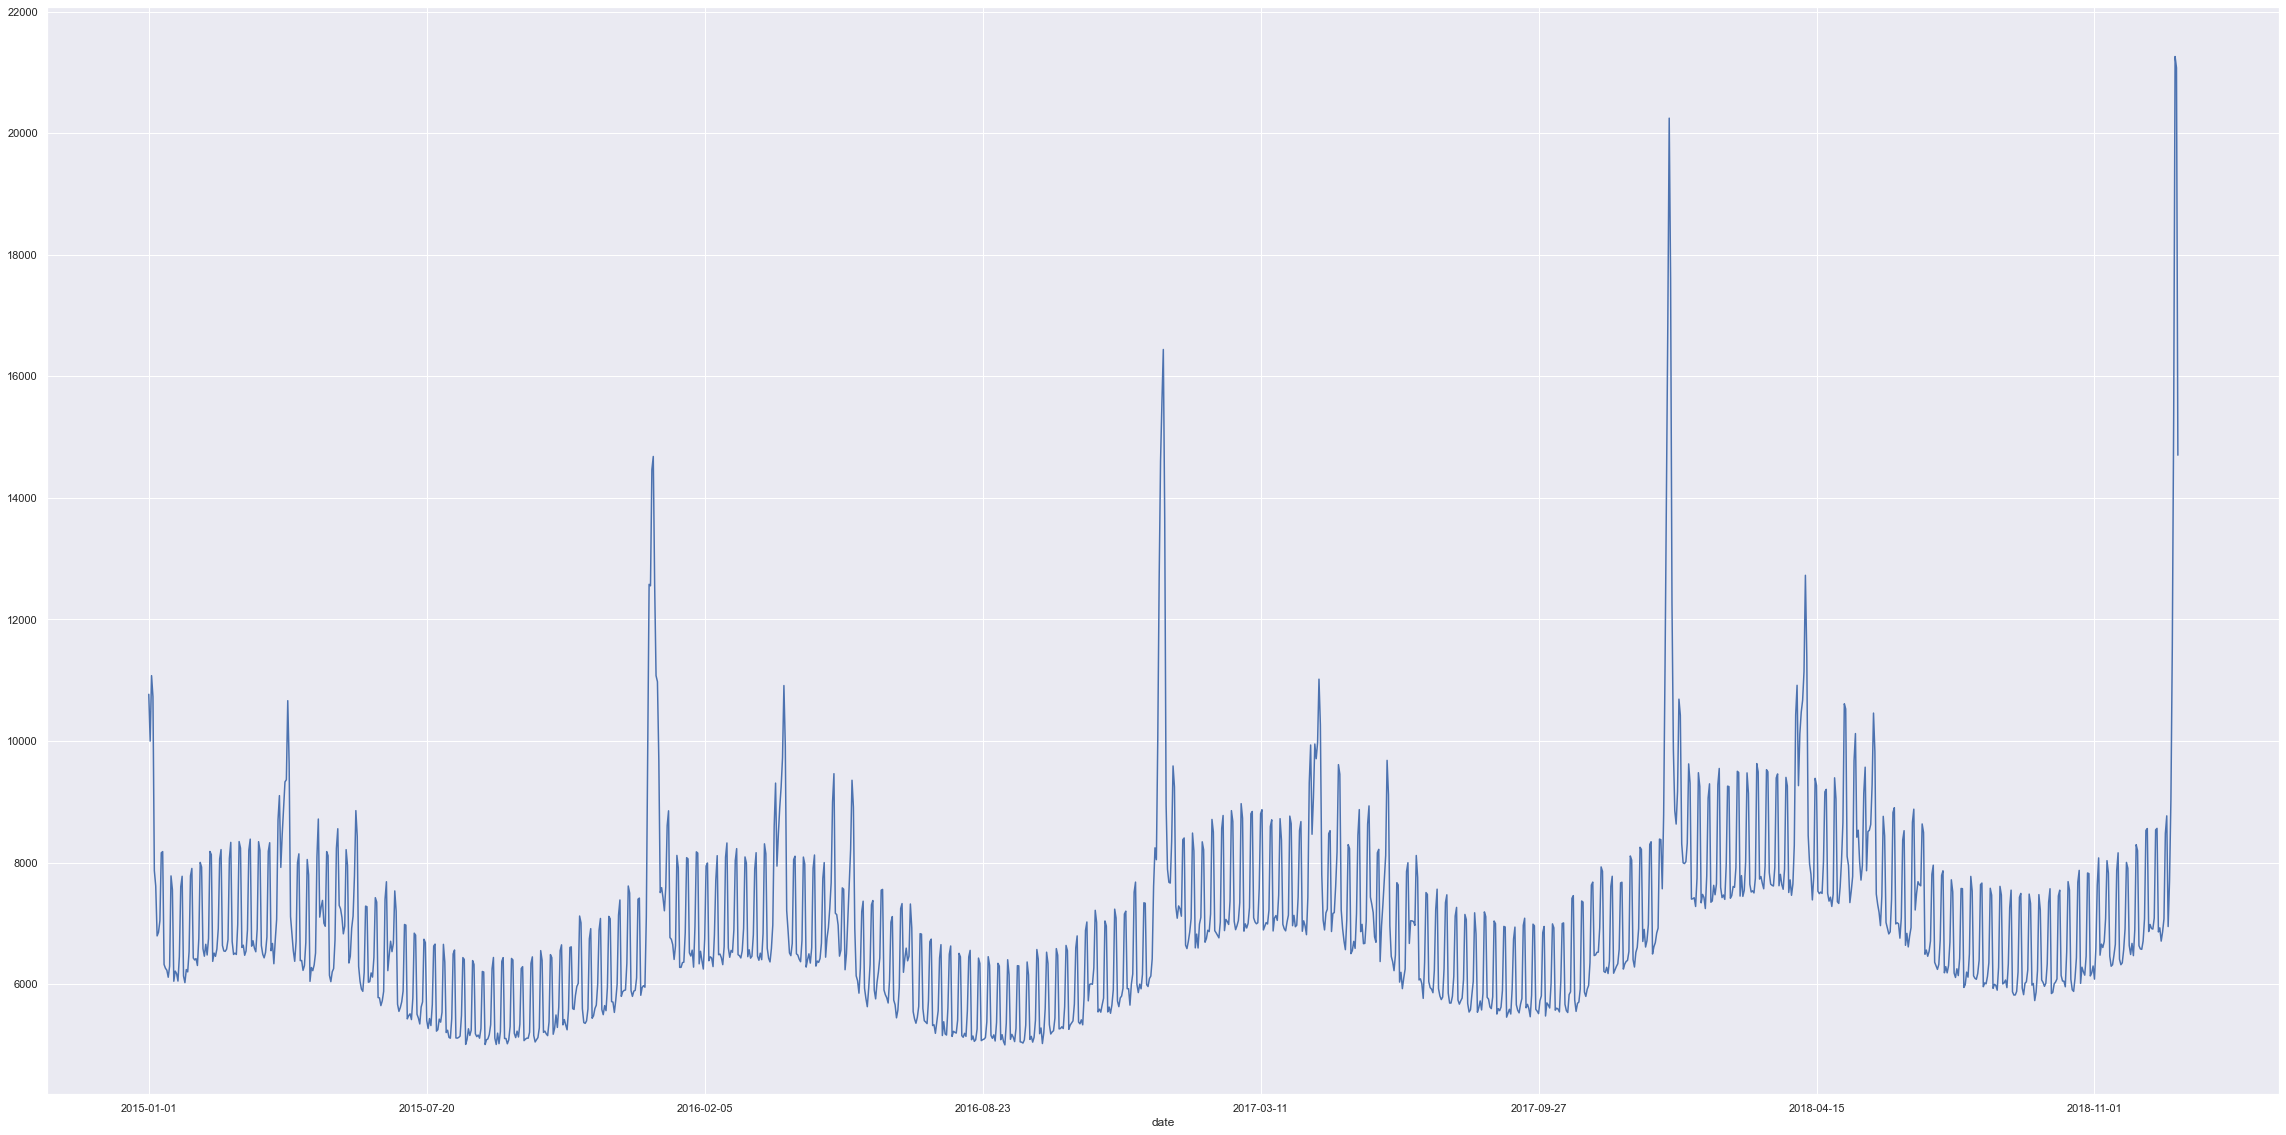

In [9]:
plt.figure(figsize=(40,20))
df.groupby('date')['num_sold'].sum().plot();

#### what is my opinion about this figure?

In certain times the total number of sold items is bigger compared to the other times, for example, you can think of the 2 or 3 first months of the year, it is obvious that during this time maybe because of Christmas we have an increase in sale since this pattern occurs each year I decided to dedicate a number between 100 to 1 to the total sold items based on the below pattern.

the maximum total sold number is 21261 and its minimun equals to 5000 based on this we can create this pattern:
 
        total number of sold items               dedicated number
          
          22000-21000                                 100
          21000-20000                                 94
          20000-19000                                 88
          19000-18000                                 82
          18000-17000                                 76
          17000-16000                                 70
          16000-15000                                 64
          15000-14000                                 58
          14000-13000                                 52
          13000-12000                                 46
          12000-11000                                 40
          11000-10000                                 34
          10000-9000                                  28
          9000-8000                                   22
          8000-7000                                   16
          7000-6000                                   10 
          6000-5000                                   4 

so the first step is finding the indicies belongs to each specific group

In [10]:
# 22000-21000
t22_21=date_sold[(date_sold['num_sold']<22000)&(date_sold['num_sold']>=21000)].index

In [11]:
# 21000-20000
t21_20=date_sold[(date_sold['num_sold']<21000)&(date_sold['num_sold']>=20000)].index

In [12]:
# 20000-19000
t20_19=date_sold[(date_sold['num_sold']<20000)&(date_sold['num_sold']>=19000)].index

In [13]:
# 19000-18000
t19_18=date_sold[(date_sold['num_sold']<19000)&(date_sold['num_sold']>=18000)].index

In [14]:
# 18000-17000
t18_17=date_sold[(date_sold['num_sold']<18000)&(date_sold['num_sold']>=17000)].index

In [15]:
# 17000-16000
t17_16=date_sold[(date_sold['num_sold']<17000)&(date_sold['num_sold']>=16000)].index

In [16]:
# 16000-15000
t16_15=date_sold[(date_sold['num_sold']<16000)&(date_sold['num_sold']>=15000)].index

In [17]:
# 15000-14000
t15_14=date_sold[(date_sold['num_sold']<15000)&(date_sold['num_sold']>=14000)].index

In [18]:
# 14000-13000
t14_13=date_sold[(date_sold['num_sold']<14000)&(date_sold['num_sold']>=13000)].index

In [19]:
# 13000-12000
t13_12=date_sold[(date_sold['num_sold']<13000)&(date_sold['num_sold']>=12000)].index

In [20]:
# 12000-11000
t12_11=date_sold[(date_sold['num_sold']<12000)&(date_sold['num_sold']>=11000)].index

In [21]:
# 11000-10000
t11_10=date_sold[(date_sold['num_sold']<11000)&(date_sold['num_sold']>=10000)].index

In [22]:
# 10000-9000
t10_9=date_sold[(date_sold['num_sold']<10000)&(date_sold['num_sold']>=9000)].index

In [23]:
# 9000-8000
t9_8=date_sold[(date_sold['num_sold']<9000)&(date_sold['num_sold']>=8000)].index

In [24]:
# 8000-7000
t8_7=date_sold[(date_sold['num_sold']<8000)&(date_sold['num_sold']>=7000)].index

In [25]:
# 7000-6000
t7_6=date_sold[(date_sold['num_sold']<7000)&(date_sold['num_sold']>=6000)].index

In [26]:
# 6000-5000
t6_5=date_sold[(date_sold['num_sold']<6000)&(date_sold['num_sold']>=5000)].index

In [27]:
t10_9

Index(['2015-01-02', '2015-04-05', '2015-04-09', '2015-04-10', '2015-04-12',
       '2015-12-26', '2016-01-03', '2016-03-27', '2016-03-31', '2016-04-01',
       '2016-04-03', '2016-05-08', '2016-05-21', '2017-01-07', '2017-01-08',
       '2017-04-15', '2017-04-16', '2017-04-18', '2017-04-19', '2017-04-20',
       '2017-04-21', '2017-05-06', '2017-05-07', '2017-06-10', '2017-06-11',
       '2018-01-02', '2018-01-05', '2018-01-13', '2018-01-14', '2018-01-20',
       '2018-01-21', '2018-01-27', '2018-01-28', '2018-02-03', '2018-02-04',
       '2018-02-10', '2018-02-11', '2018-02-17', '2018-02-18', '2018-02-24',
       '2018-02-25', '2018-03-03', '2018-03-04', '2018-03-10', '2018-03-11',
       '2018-03-17', '2018-03-18', '2018-03-24', '2018-03-25', '2018-04-02',
       '2018-04-14', '2018-04-15', '2018-04-21', '2018-04-22', '2018-04-28',
       '2018-04-29', '2018-05-12', '2018-05-19', '2018-05-20', '2018-05-25',
       '2018-05-27', '2018-12-26'],
      dtype='object', name='date')

time to assign the values to the indicies 

In [28]:
# just in case, let's make a copy of the main dataset and work with that copy
df1=df.copy()

In [29]:
for i in range(0,26298):
    if df1.iloc[i,1] in t22_21:
       df1.iloc[i,1]=100
    
    elif df1.iloc[i,1] in t21_20:    
        df1.iloc[i,1]=94    
    
    elif df1.iloc[i,1] in t20_19:
        df1.iloc[i,1]=88
    
    
    elif df1.iloc[i,1] in t19_18:
        df1.iloc[i,1]=82
    
    elif df1.iloc[i,1] in t18_17:
        df1.iloc[i,1]=76
    
    elif df1.iloc[i,1] in t17_16:
        df1.iloc[i,1]=70
    
    elif df1.iloc[i,1] in t16_15:
        df1.iloc[i,1]=64
    
    elif df1.iloc[i,1] in t15_14:
       df1.iloc[i,1]=58
    
    elif df1.iloc[i,1] in t14_13:
        df1.iloc[i,1]=52
    
    elif df1.iloc[i,1] in t13_12:
        df1.iloc[i,1]=46
    
    elif df1.iloc[i,1] in t12_11:
        df1.iloc[i,1]=40
    
    elif df1.iloc[i,1] in t11_10:
        df1.iloc[i,1]=34
    
    elif df1.iloc[i,1] in t10_9:
        df1.iloc[i,1]=28
    
    elif df1.iloc[i,1] in t9_8:
        df1.iloc[i,1]=22
    
    elif df1.iloc[i,1] in t8_7:
       df1.iloc[i,1]=16
    
    elif df1.iloc[i,1] in t7_6:
        df1.iloc[i,1]=10
    
    elif df1.iloc[i,1] in t6_5:
        df1.iloc[i,1]=4    

In [30]:
df1['date']

0        34
1        34
2        34
3        34
4        34
         ..
26293    58
26294    58
26295    58
26296    58
26297    58
Name: date, Length: 26298, dtype: object

<AxesSubplot:>

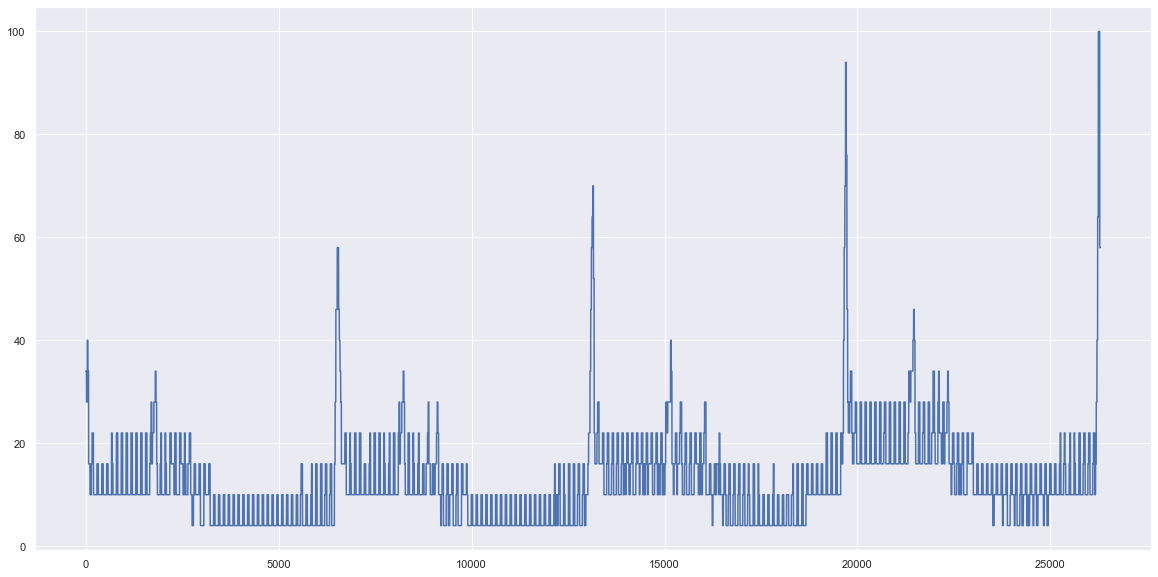

In [31]:
# let's see what we have done
plt.figure(figsize=(20,10))
df1['date'].plot()

not bad!!! 
it is almost same as the main chart

it has some noises but don't worry we will deal with it in next parts

.
.
.
.
.
now we should deal with `country` feature

In [32]:
df1['country'].value_counts()

Norway     8766
Finland    8766
Sweden     8766
Name: country, dtype: int64

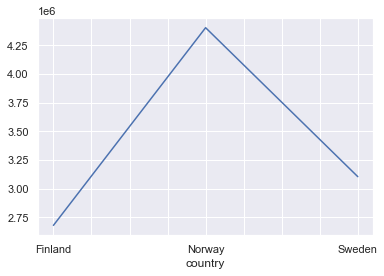

In [33]:
df1.groupby('country')['num_sold'].sum().plot();

it seems for each country we have 

`2,750,000` sold items in Finland.

almost `4,400,000` sold items in Norway.

and roughly `3,125,000` sold items in Sweden.

 so totally we have 10,275,000 items which were sold in kaggle shops 
 
 thus we can assign a number to each country by this formula:
 
 ##### total number sold in the country / total sold number = the number assigned to the country

As a result we will get:

0.267 for `Finland`

0.428 for `Norway`

0.304 for `Sweden`

In [34]:
# let's replace the number with the countries

for i in range(0,26298):
    if df1.iloc[i,2] == 'Sweden':
       df1.iloc[i,2]=0.304
    
    elif df1.iloc[i,2] =='Norway':
       df1.iloc[i,2]=0.428
    
    elif df1.iloc[i,2] == 'Finland':
       df1.iloc[i,2]=0.267

In [35]:
# let's see have we done it correctly?
df1['country'].value_counts()

0.267    8766
0.428    8766
0.304    8766
Name: country, dtype: int64

time to check store column

In [36]:
df1.groupby('store')['num_sold'].sum()

store
KaggleMart    3715368
KaggleRama    6475990
Name: num_sold, dtype: int64

In [37]:
df1['store'].value_counts()

KaggleRama    13149
KaggleMart    13149
Name: store, dtype: int64

In [38]:
# let's replace the number with the stores

for i in range(0,26298):
    if df1.iloc[i,3] == 'KaggleMart':
       df1.iloc[i,3]=0.635
    
    elif df1.iloc[i,3] =='KaggleRama':
       df1.iloc[i,3]=0.368

In [39]:
df1.head()

,row_id,date,country,store,product,num_sold
0,0,34,0.267,0.635,Kaggle Mug,329
1,1,34,0.267,0.635,Kaggle Hat,520
2,2,34,0.267,0.635,Kaggle Sticker,146
3,3,34,0.267,0.368,Kaggle Mug,572
4,4,34,0.267,0.368,Kaggle Hat,911


time to assign the last feature

In [40]:
df1['product'].value_counts()

Kaggle Sticker    8766
Kaggle Hat        8766
Kaggle Mug        8766
Name: product, dtype: int64

In [41]:
plt.figure(figsize=(20,10))
df1.groupby('product')['num_sold'].sum()

product
Kaggle Hat        5512465
Kaggle Mug        3106287
Kaggle Sticker    1572606
Name: num_sold, dtype: int64

<Figure size 1440x720 with 0 Axes>

In [42]:
for i in range(0,26298):
    if df1.iloc[i,4] == 'Kaggle Hat':
       df1.iloc[i,4]=0.54
    
    elif df1.iloc[i,4] =='Kaggle Mug':
       df1.iloc[i,4]=0.304
    
    elif df1.iloc[i,4] == 'Kaggle Sticker':
       df1.iloc[i,4]=0.154

In [43]:
df1.head()

,row_id,date,country,store,product,num_sold
0,0,34,0.267,0.635,0.304,329
1,1,34,0.267,0.635,0.54,520
2,2,34,0.267,0.635,0.154,146
3,3,34,0.267,0.368,0.304,572
4,4,34,0.267,0.368,0.54,911


In [44]:
# since we transform all the categorical values to numerical we can save it now!
df1.to_csv('first_tabular_jan.csv')

since we have done all the transformations the question is our dataset is ready
to be used in prediction process?

I would say no because of two reasons

1. we may have outliers which can reduce the accuracy of our prediction

2. the dataset might have some features that can be irrelevant to the sold items number

so we should deal with two problems first 

### outliers

to find the outliers of each column we will use a scatter plot with alpha=0.25

1. date

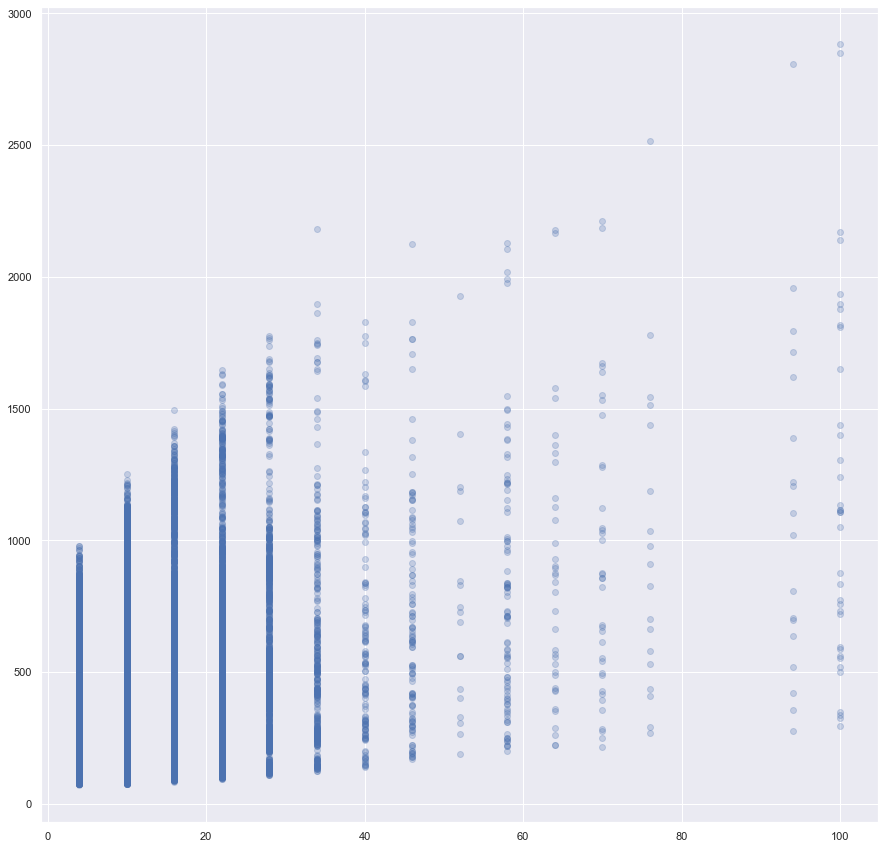

In [50]:
plt.figure(figsize=(15,15))
plt.scatter(df1['date'],df1['num_sold'],alpha=0.25);

such a mess!!!!

ok, we have two methods to deal with this disfigured plot, 

1. we can delete the dates which are few in number

2. sicne we have decent amount of data we can remove outliers

In [51]:
df1['date'].value_counts()

10     9360
4      6624
16     5688
22     2700
28     1116
34      324
40      126
46      108
58       90
64       36
100      36
70       36
52       18
76       18
94       18
Name: date, dtype: int64

we will delete `94,76,52,70,100,64,58,46,40,34` columns

In [58]:
# find the indices of those dates
df1[df1['date']==94].index

Int64Index([19692, 19693, 19694, 19695, 19696, 19697, 19698, 19699, 19700,
            19701, 19702, 19703, 19704, 19705, 19706, 19707, 19708, 19709],
           dtype='int64')

In [68]:
# removing
df1.drop(df1[df1['date']==34].index,inplace=True,axis=0)

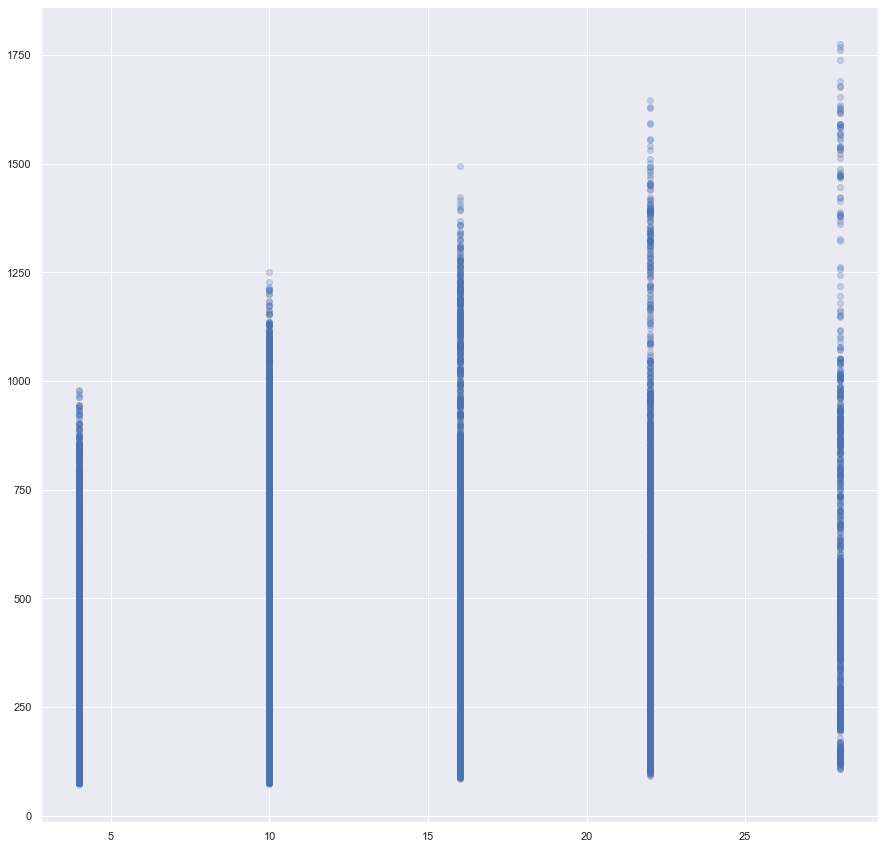

In [69]:
# after removing the columns we mentioned earlier we have
plt.figure(figsize=(15,15))
plt.scatter(df1['date'],df1['num_sold'],alpha=0.25);

now it's time to remove outliers

In [71]:
df1['date'].value_countsnts()

10    9360
4     6624
16    5688
22    2700
28    1116
Name: date, dtype: int64

In [95]:
# find the indices of those dates
df1[(df1['date']==22)&(df1['num_sold']>1210)].index

Int64Index([  676,   802,   820,   928,  1054,  1180,  1198,  1306,  1450,
             1954,  2440,  6976,  7102,  7120,  7372,  7480,  7498,  7624,
             7732,  7876,  8002,  8362,  8380,  8632, 13186, 13420, 13528,
            13780, 13798, 13924, 14032, 14050, 14176, 14410, 14554, 14680,
            14806, 15562, 15814, 15922, 15940, 16030, 16426, 19630, 19774,
            19792, 20692, 22168, 22492, 22744, 22852, 22978, 26002, 26020,
            26146],
           dtype='int64')

In [93]:
# removing
df1.drop(df1[(df1['date']==22)&(df1['num_sold']>1000)&(df1['num_sold']<1210)].index,inplace=True,axis=0)

after removing outliers we have

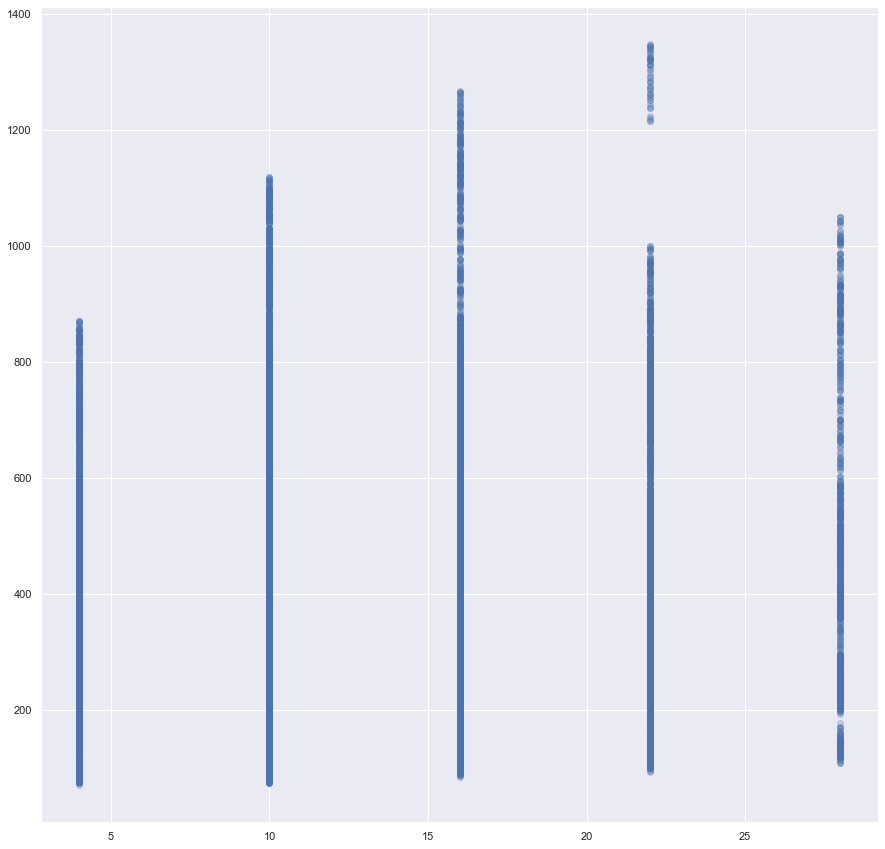

In [96]:
plt.figure(figsize=(15,15))
plt.scatter(df1['date'],df1['num_sold'],alpha=0.25);

In [97]:
df1.to_csv('tabular_kaggle_jan_2022.csv')

now it's time to get into the feature importance

 I found a useful link that provides methods about feature importance 
 and i will put that below, however, based on my experience I decided to use correlation as feature importnace, because of this I am going to use corr method of pandas dataframe. 

<AxesSubplot:>

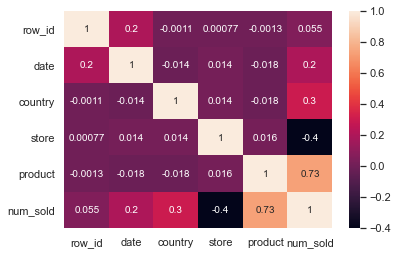

In [99]:
sns.heatmap(df1.corr(),annot=True)

as we expected before row_id has nothing to do with num_sold

date column is not related too much to num_sold (since we remove fewer number of dates like christmas) 

store surprisingly has negative correlation with num_sold

and at last country correlation is mere 0.3

### now the question is what we can do with this numbers?

my decison was multiplying the correlatoin number into each column,
by doing this we will have more related feature bigger in number which would be useful especially in neural network




[since row_id correlation is 0.05 and it is really close to zero I will remove this column from dataset]

In [100]:
df1.drop('row_id',axis=1,inplace=True)

In [101]:
df1.head()

,date,country,store,product,num_sold
18,28,0.267,0.635,0.304,318
19,28,0.267,0.635,0.540,493
20,28,0.267,0.635,0.154,127
21,28,0.267,0.368,0.304,544
22,28,0.267,0.368,0.540,794


In [102]:
# time to use out method of correlation
df1['date']=df1['date']*0.2

In [103]:
df1['store']=df1['store']*-0.4

In [104]:
df1['country']=df1['country']*0.3

In [105]:
df1['product']=df1['product']*0.73

In [106]:
df1.head()

,date,country,store,product,num_sold
18,5.6,0.0801,-0.2540,0.22192,318
19,5.6,0.0801,-0.2540,0.39420,493
20,5.6,0.0801,-0.2540,0.11242,127
21,5.6,0.0801,-0.1472,0.22192,544
22,5.6,0.0801,-0.1472,0.39420,794


In [107]:
# time to scale our dataset

In [108]:
df1['store']=df1['store']*100
df1['product']=df1['product']*100
df1['country']=df1['country']*100

In [109]:
df1.head()

,date,country,store,product,num_sold
18,5.6,8.01,-25.40,22.192,318
19,5.6,8.01,-25.40,39.420,493
20,5.6,8.01,-25.40,11.242,127
21,5.6,8.01,-14.72,22.192,544
22,5.6,8.01,-14.72,39.420,794


I think we are ready to use different models for our prediction

In [110]:
df1.to_csv('tabular_kaggle_jan_2022_final.csv')

In [6]:
df1.head()

,date,country,store,product,num_sold
0,5.6,8.01,-25.40,22.192,318
1,5.6,8.01,-25.40,39.420,493
2,5.6,8.01,-25.40,11.242,127
3,5.6,8.01,-14.72,22.192,544
4,5.6,8.01,-14.72,39.420,794


## modeling

in this section we are going to use 3 different models as follows:

1. deep neural network

2. random forest regressor

3. support vectore machine (SVR)

we will check the mean squared error and SMAPE evaluatoins for each method and at last will chose the model who has the least value in both metrics

1. deep neural network model

In [7]:
# import relevant libraries 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [18]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# the link above will help you how to choose a the number of hidden layers in our model

model.add(Dense(units=4,activation='relu'))

model.add(Dense(units=5,activation='relu'))

model.add(Dense(units=5,activation='relu'))

model.add(Dense(units=6,activation='relu'))

model.add(Dense(units=5,activation='relu'))

model.add(Dense(units=5,activation='relu'))

model.add(Dense(units=3,activation='relu'))

model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min',min_delta=0.002,verbose=1, patience=12)

In [6]:
from sklearn.model_selection import train_test_split

In [37]:
x=df1.drop('num_sold',axis=1)
y=df1['num_sold']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=86)

In [19]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[early_stop],epochs=700,batch_size=100)

Epoch 1/700
215/215 [==============================] - 3s 4ms/step - loss: 173936.0938 - val_loss: 99389.3594
Epoch 2/700
215/215 [==============================] - ETA: 0s - loss: 46456.980 - 1s 2ms/step - loss: 45428.1289 - val_loss: 32586.9238
Epoch 3/700
215/215 [==============================] - 1s 2ms/step - loss: 27106.4297 - val_loss: 20326.8281
Epoch 4/700
215/215 [==============================] - 1s 3ms/step - loss: 17184.5449 - val_loss: 13258.5430
Epoch 5/700
215/215 [==============================] - 1s 2ms/step - loss: 11659.9111 - val_loss: 9199.1572
Epoch 6/700
215/215 [==============================] - 1s 2ms/step - loss: 8515.5020 - val_loss: 7252.4946
Epoch 7/700
215/215 [==============================] - 1s 2ms/step - loss: 7367.2305 - val_loss: 6812.1724
Epoch 8/700
215/215 [==============================] - 1s 3ms/step - loss: 7142.7754 - val_loss: 6691.2476
Epoch 9/700
215/215 [==============================] - 1s 2ms/step - loss: 7085.7441 - val_loss: 6659.6431

In [20]:
predictoin_NN=model.predict(x_test)

In [28]:
# evaluation time
import numpy as np

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

from sklearn.metrics import mean_squared_error

In [23]:
predictoin_NN=predictoin_NN.reshape((3778,))

In [25]:
print('the SMAPE value of our prediction from neural network is: {}'.format(smape(predictoin_NN,y_test)))
print('..........................................')
print('..........................................')
print('the mean squared error of our prediction from neural network is: {}'.format(mean_squared_error(predictoin_NN,y_test)))

the SMAPE value of our prediction from neural network is: 17.040241639734756
..........................................
..........................................
the mean squared error of our prediction from neural network is: 4247.1466347839305


#### it seems it is not accurate well 😑

2. random forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf=RandomForestRegressor(n_estimators=30)

In [28]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=30)

In [29]:
prediction_rf=rf.predict(x_test)

In [31]:
print('the SMAPE value of our prediction from random forest is: {}'.format(smape(prediction_rf,y_test)))
print('..........................................')
print('..........................................')
print('the mean squared error of our prediction from random forest is: {}'.format(mean_squared_error(prediction_rf,y_test)))

the SMAPE value of our prediction from random forest is: 8.670446725009493
..........................................
..........................................
the mean squared error of our prediction from random forest is: 1880.5892987753534


it is much better than the result we just get in neural network but
the question is can we improve it

maybe, we will perform grid search for `n_estimators` parameter to see can we get a better result based on different number of estimators

In [47]:
from sklearn.model_selection import GridSearchCV

In [33]:
 parameters = {'n_estimators':[5,10,15,20,25,30,35,50,60,80]}

In [34]:
 grid_rf = GridSearchCV(rf, parameters)

In [44]:
grid_rf.best_params_

{'n_estimators': 25}

In [36]:
grid_rf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=30),
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 50, 60,
                                          80]})

In [38]:
prediction_rf_grid=grid_rf.predict(x_test)

In [39]:
print('the SMAPE value of our prediction from random forest grid search is: {}'.format(smape(prediction_rf_grid,y_test)))
print('..........................................')
print('..........................................')
print('the mean squared error of our prediction from random forest grid search is: {}'.format(mean_squared_error(prediction_rf_grid,y_test)))

the SMAPE value of our prediction from random forest grid search is: 8.670614778828929
..........................................
..........................................
the mean squared error of our prediction from random forest grid search is: 1883.1415264047105


unfortunately we couldn't improve our accuracy by using grid search 😥

now it's time to use our second approach which was using dummy variables

using dummy variables does make sense when you do not have too many categorical variables, however, the problem is in `date` column we have to many different variables, so to deal with this problem we can remove `date` feature and keep going without this.

In [13]:
df2=pd.read_csv(r'E:\specialize\data science\project\tabular playground kaggle\jan 2022\dataset\train.csv')

In [14]:
df2.drop('date',axis=1,inplace=True)

In [16]:
df2.drop('row_id',axis=1,inplace=True)

In [17]:
df2.head()

,country,store,product,num_sold
0,Finland,KaggleMart,Kaggle Mug,329
1,Finland,KaggleMart,Kaggle Hat,520
2,Finland,KaggleMart,Kaggle Sticker,146
3,Finland,KaggleRama,Kaggle Mug,572
4,Finland,KaggleRama,Kaggle Hat,911


In [18]:
x=df2.drop('num_sold',axis=1)
y=df2['num_sold']

In [19]:
# one hot encoding
x=pd.get_dummies(x)

In [21]:
x.head()

,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,1,0,0,1,0,0,1,0
1,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,1
3,1,0,0,0,1,0,1,0
4,1,0,0,0,1,1,0,0


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf2=RandomForestRegressor(n_estimators=30)

In [25]:
rf2.fit(x_train,y_train)

RandomForestRegressor(n_estimators=30)

In [26]:
pre_rf2=rf2.predict(x_test)

In [29]:
print('the SMAPE value of our prediction from random forest of dummies is: {}'.format(smape(pre_rf2,y_test)))
print('..........................................')
print('..........................................')
print('the mean squared error of our prediction from random forest of dummies search is: {}'.format(mean_squared_error(pre_rf2,y_test)))

the SMAPE value of our prediction from random forest of dummies is: 15.994653397832703
..........................................
..........................................
the mean squared error of our prediction from random forest of dummies search is: 12709.66330067271


# done